# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'0.24.2'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [0]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [0]:
r, c = df.shape
print("rows = {0}, columns = {1}".format(r,c))

rows = 32561, columns = 15


3) Какие типы данных у элементов этого датасета? (1 балл)

In [5]:

df.info(verbose = True, null_counts = False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               int64
workclass         object
fnlwgt            int64
education         object
education.num     int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    object
income            object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски? (1 балл)

In [0]:

df = df.replace(' ?',np.nan)
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

*5*) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

Ваш ответ:Все пропущенные признаки отноятся к категориальным значениям, то есть количество возможных ответов сильно ограничено, так как это опрос,то скорее человек не смог соотнести себя с предложенными вариантами(например, такое возникло в "рабочем классе") 

6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [6]:
print(df.workclass.value_counts())
print("количество, без пропусков: {}".format(df.workclass.nunique()-1))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
количество, без пропусков: 8


7) Какой средний возраст женщин и мужчин? (1 балл)

In [0]:
l = df[['sex', 'age']].groupby(['sex']).aggregate(sum)
print(l.groupby(['sex']).get_group(' Male').iloc[0]/df.sex.value_counts()[' Male'])

print(l.groupby(['sex']).get_group(' Female').iloc[0]/df.sex.value_counts()[' Female'])





8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

AxesSubplot(0.125,0.125;0.775x0.755)


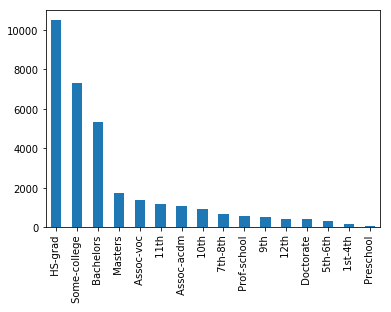

In [0]:
print(df['education'].value_counts().plot(kind='bar'))

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

In [0]:
l = df[['income', 'age']].groupby(['income']).agg(["mean","std"])
l

10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

In [0]:
l = df[['income', 'education']].groupby(['income']).get_group(' >50K')
rows = l.shape[0]
EduRows = l.loc[l['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])].shape[0]
if rows - EduRows>0:
  print("не все имеют высшее образование")
else: 
  print("все имеют высшее образование")

не все имеют высшее образование


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [0]:
l = df.groupby(['sex']).get_group(' Male').groupby(['income']).get_group(' >50K')
rows = l.shape[0]
marriedRows = l.loc[l['marital.status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse'])].shape[0]

if rows - marriedRows>0:
  print("Среди женатых")
else:
  print("Среди неженатых")

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [0]:
l = df[['native.country','hours.per.week', 'income']].groupby(['native.country','income'])['hours.per.week'].agg(["mean"])

l

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

In [0]:
import numpy as np
df['difference'] =(df['capital.gain']-df['capital.loss'])
df['difference'] = df['difference'].replace(0,1) 
num = df._get_numeric_data() #все отрицательные и те, что = 0, разности будут 0(после взятия лог2)
num[num < 0] = 1
df['difference'] =np.log2(df['difference']).apply(np.round)

print("Число уникальных значений {}".format(df.difference.nunique()))

df[['education','difference']].groupby(['education'])['difference'].mean() #возьмем среднее от значения в диапазоне


Число уникальных значений 10


education
 10th            0.504823
 11th            0.532766
 12th            0.598152
 1st-4th         0.357143
 5th-6th         0.501502
 7th-8th         0.739938
 9th             0.667315
 Assoc-acdm      0.963449
 Assoc-voc       1.209841
 Bachelors       1.557983
 Doctorate       2.556901
 HS-grad         0.798686
 Masters         2.124782
 Preschool       0.529412
 Prof-school     3.786458
 Some-college    0.808257
Name: difference, dtype: float64

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

In [0]:
l = df.groupby(['sex']).get_group(' Female').groupby(['income']).get_group(' >50K')
l['native.country'].value_counts().index.tolist()[0]

' United-States'

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

In [0]:
import numpy as np

def magic_row(row):
    if row['income'] == ' <=50K':
      result = np.random.randint(0,51)
    else: result = np.random.randint(51,200+1)
    return result

df['magic_salary'] = df.apply(lambda row : magic_row(row), axis=1) 
df[['education', 'magic_salary']].groupby(['education'])['magic_salary'].mean()

education
 10th            32.574491
 11th            29.359149
 12th            32.575058
 1st-4th         28.452381
 5th-6th         29.906907
 7th-8th         32.190402
 9th             29.212062
 Assoc-acdm      49.626054
 Assoc-voc       51.790159
 Bachelors       66.615873
 Doctorate       99.769976
 HS-grad         41.093039
 Masters         80.441672
 Preschool       27.078431
 Prof-school     99.324653
 Some-college    44.066383
Name: magic_salary, dtype: float64